<div class="alert alert-block alert-info" >
    <h1>PDF EXTRACTION</h1>
    <h3>Created on $18^{th}$ November, 2020 </h3>
</div>

The aim is to extract the content from any given pdf file, especially the pdf related to the crash test.

## Importing the methods and other supporting libraries

Have imported 5 methods for pdf extraction

- PyPDF2 (popularly recommended)
- textract 
- tika
- pdfplumber
- pdfminer

In [1]:
#Headers

import PyPDF2  
import textract
from tika import parser
# import pdfplumber
import pikepdf
import IPython


# from io import StringIO

from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfparser import PDFParser

# Note:- there is a problem in importing pdfplumber couldn't track on it

In [3]:
import io

def extract_text_from_pdf(pdf_path):
    resource_manager = PDFResourceManager()
    fake_file_handle = io.StringIO()
    converter = TextConverter(resource_manager, fake_file_handle)
    page_interpreter = PDFPageInterpreter(resource_manager, converter)
    
    with open(pdf_path, 'rb') as fh:
        for page in PDFPage.get_pages(fh, 
                                      caching=True,
                                      check_extractable=True):
            page_interpreter.process_page(page)
            
        text = fake_file_handle.getvalue()
    
    # close open handles
    converter.close()
    fake_file_handle.close()
    
    if text:
        return text
    
if __name__ == '__main__':
    print(extract_text_from_pdf(document[-1]))

20SAFETYWISSEN20Rules and Regulations on Occupant ProtectionFull Width FrontalOffset FrontalUSAFMVSS 20856 km/hH III50 %H III50 %0o 56 km/hH III5 %H III5 %0° / ± 5° 32-40km/hH III5 %H III5 %0° / ± 5° 32-40 km/hH III50 %H III50 %0° /  ± 30°FMVSS 20840 km/hH III5 %H III5 %0oODB 40 %200 mmEuropeUN R137150 km/hH III50 %H III5 %0oUN R9456 km/hH III50 %H III50 %0oODB 40 %200 mmJapanArt. 1850 km/hH III50 %H III5 %0oArt 1856 km/hH III50 %H III50 %0oODB 40 %200 mmChinaGB 11551-201450 km/hH III50 %H III50 %0oGB/T 20913-200756 km/hH III50 %H III50 %0oODB 40 %200 mmIndiaAIS-09856 km/hH III50 %H III50 %0oODB 40 %200 mmSouth KoreaKMVSS 102-348,3 / 502 H III50 %H III50 %5 %20oAustraliaADR 69/0048 km/hH III50 %H III50 %0oADR 73/0056 km/hH III50 %H III50 %0oODB 40 %200 mm1 Mandatory as part of the EU type approval for new types from July 6, 2022, for new registrations from July 7, 2024.2 From September 2020UPDATE24SAFETYWISSEN24UPDATEFMVSS 305: Safety Requirements for Electric VehiclesScop

Six different documents have been taken

- SafetyCompanion-2020-EN.pdf is recommended
- euroncap-2019-vw-golf-datasheet.pdf is also related to the recommendation
- Test_pdf_1.pdf is a research paper consists of equations and images
- Test_pdf_2.pdf is created using latex a plain text file
- Test_pdf_3.pdf is a research paper consists of images, tables and equations
- Test_pdf_4.pdf is a presentation file

Have included all the possible type of contents to get in a pdf 

Note:- Didn't consider scanned documents since it might be out of scope

In [2]:
#Variable declaration

#Root path for the file and document name
file_path = '/home/ganesh/Documents/NLP-Fraunhofer/Pdf_extraction/pdf/'

document = [file_path + 'SafetyCompanion-2020-EN.pdf',
            file_path + 'Test_pdf_1.pdf',
            file_path + 'Test_pdf_2.pdf',
            file_path + 'Test_pdf_3.pdf',
            file_path + 'Test_pdf_4.pdf',
            file_path + 'euroncap-2019-vw-golf-datasheet.pdf',
            file_path + 'SafetyCompanion-2020-EN-pages-20,24.pdf']


## PyPDF2

In [3]:
def py_Pdf_Extraction(filename):
    # creating a pdf file object for read 
    pdffileobj = open(filename, 'rb')  

    # creating a pdf reader object  
    pdfreader = PyPDF2.PdfFileReader(pdffileobj) 
    
    # Check if the pdf is encrypted
    if pdfreader.isEncrypted:
        #Decrypting the pdf using pikepdf
        with pikepdf.open(filename) as pdf:
            num_pages = len(pdf.pages)
            del pdf.pages[-1]
            pdf.save('decrypted.pdf')
            filename = 'decrypted.pdf'
            pdfreader = PyPDF2.PdfFileReader(filename)
    
    print("Document info \n")
    print(pdfreader.documentInfo)
    num_of_pages = pdfreader.numPages
    print('\n Number of pages: ' + str(num_of_pages))
    
    # Extracting just the second page content 
    # Note:- Index starts from 0 even the page number starts from 1
    with open(filename, 'rb') as file:
        pdf = PyPDF2.PdfFileReader(file)
        page = pdf.getPage(1)
        print("Extracted page - 2nd \n \n ")
        print(page.extractText())
        
    


In [4]:
py_Pdf_Extraction(document[0])


Document info 

{'/Author': 'carhs.training gmbh', '/CreationDate': "D:20191219100940+01'00'", '/Creator': 'Adobe InDesign 15.0 (Windows)', '/ModDate': "D:20200629161816+02'00'", '/Producer': 'Adobe PDF Library 15.0', '/Title': 'SafetyCompanion 2020 EN VERSION 1.6', '/Trapped': '/False'}

 Number of pages: 187
Extracted page - 2nd 
 
 
gns Œ GESELLSCHAFT FÜR NUMERISCHE SIMULATION MBH
Am Gaußberg 2    38114 Braunschweig
Phone: 0531-80112-0    mbox@gns-mbh.comwww.gns-mbh.comSOLUTIONS 
for the automotive IndustryENGINEERING    SOFTWARE DEVELOPEMENT
    CONSULTING
GENERATOR 4
Pedestrian & Occupant Safety at its best
FMVSS201, ECE-R21, 
2003/102/EC, EuroNCAP...OPENFORMThe industrial solution for 
sheet metal forming simulation

ANIMATOR 4
The next generation of 
FEA postprocessing





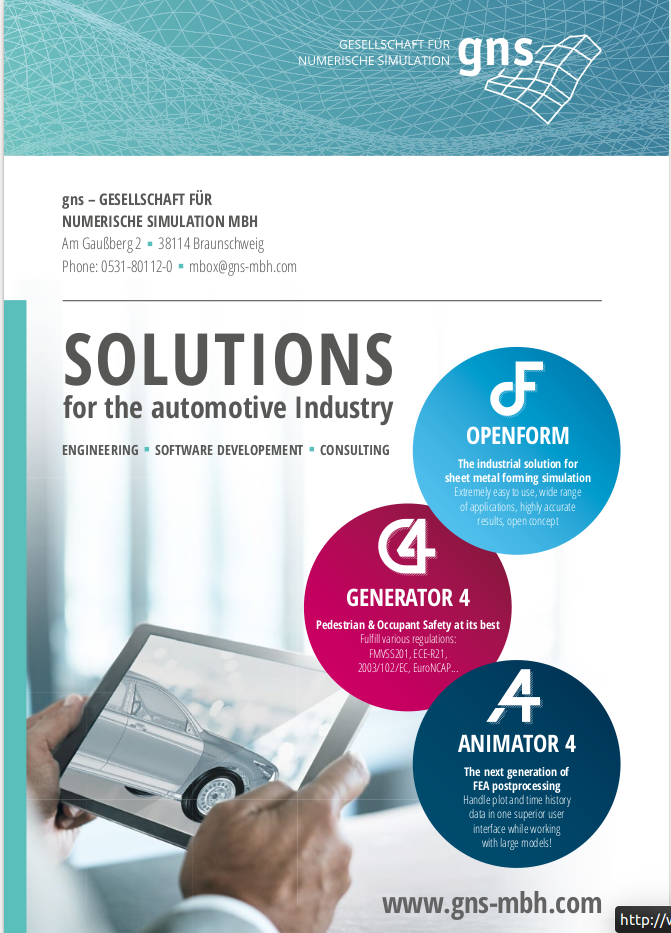

In [5]:
IPython.core.display.Image("Images/PDF1.png", embed=True)

**Observation - Comparing the extraction with the image**
- "Openform" and its content (small case letters are missing) is displayed after Generator
- "Animator" the wordings in the small case is totally missed
- website www.gns-mbh.com appear above the content which is not the actual case

In [6]:
py_Pdf_Extraction(document[1])


Document info 

{'/ModDate': "D:20180103123348+05'30'", '/CreationDate': "D:20180103123341+05'30'", '/Title': 'Microsoft Word - self publications.doc', '/Creator': 'PrimoPDF http://www.primopdf.com', '/Author': 'harsh', '/Producer': 'Nitro PDF PrimoPDF'}

 Number of pages: 9
Extracted page - 2nd 
 
 



2

˘ˇˆ˙˝˛˙˛˚˘
˘˜˘"˜˝˛˛!˝˜˛˘"˛%˝
˛$*

˙)˚&˝'
˛$*$%

˙+˙,
˙˝#˝˛˝˛˝˜#˝˛˘˛
˝ 3˙˝#˘"˙˝˛
%˝" %˝˙"˝˜˙˝#˝˛"!˝#˝
 ˘˙˛˘#˝˜˚˘ ˝
˛!˛"˙""˝"˛ 
"˝

˝#˝˛"!˝#%˝
#˝$˛! ˘˛ ˛˙˛!˛"˝˘˛˜˝
#˝˛˙˝˛  ˙
˙˝#˝˛"!˝#˛ !"#!˝˙˛!
˝˘˛˜˝#"˛
#˝˛˝"˛$˝˘ !"#!˝˙˛
!#˛˘"˝˛˘˙˛˛˙#˛,
˛",˝˝˛,˛ ˙˝#˝˛

 ˙˙˝˛˛˜˝#()˙"˝"
" ˝ ˙˝˘
˛˜˝#*""˛˛˜˝#˝˛'
,%˝4 #˛˝˛"˛˜˝#
˚˘$"˛˝˝˛4 #˛˝˛"˜˝# "˝˛!
˛!" #˛˝˛˜˝""˝% 
˝˛4 #˛˝˛"˛˝ #˛˝˛

54˝˜˙"˝˙˙˝#˘ ˛ ˛˜˝
#˙˝˜˜˙˛˚˘˛6 
7˘˛6 ˙˝˜˜˙˛˙˝  "˝""˙
˝˙˝˜˚˘˛6˝˛˜˜˙
˛#˝˛˛  ˝˝˛

 $˛!˝˜"$˝˙˝˘
˛˜˝#()

*"4$"˘ ˛ ˙˝˜˜˙˛˛"˘˛˙˝
" 

ˇ˛!˙˝#˙˝˛˙$ #ˆ#˘#!˛"˛
!˛˝˛˜%
˙˝˜˜˙˛

*%˝˘" ˛˝˝"˝˛#˙˘˝$
 ˝˝$˛ ˙˛˚˘"
˘ ˝!˛"%˝˘˝#˛ ˝˜˙˝#˝˛8˛
˝˜#˝!˛˜˙˛#˝ ˝˜
˙˝#˝˛"!˝#˙˝˛˛
˜˝#()
˝!$˛˚˘˛˙ˆ9˛:,˜˝˛;<˝14+,

˛ ˛$ ˜˛ 

+4
1
,)+
5(
˙
:9:95:=9>:9+<
















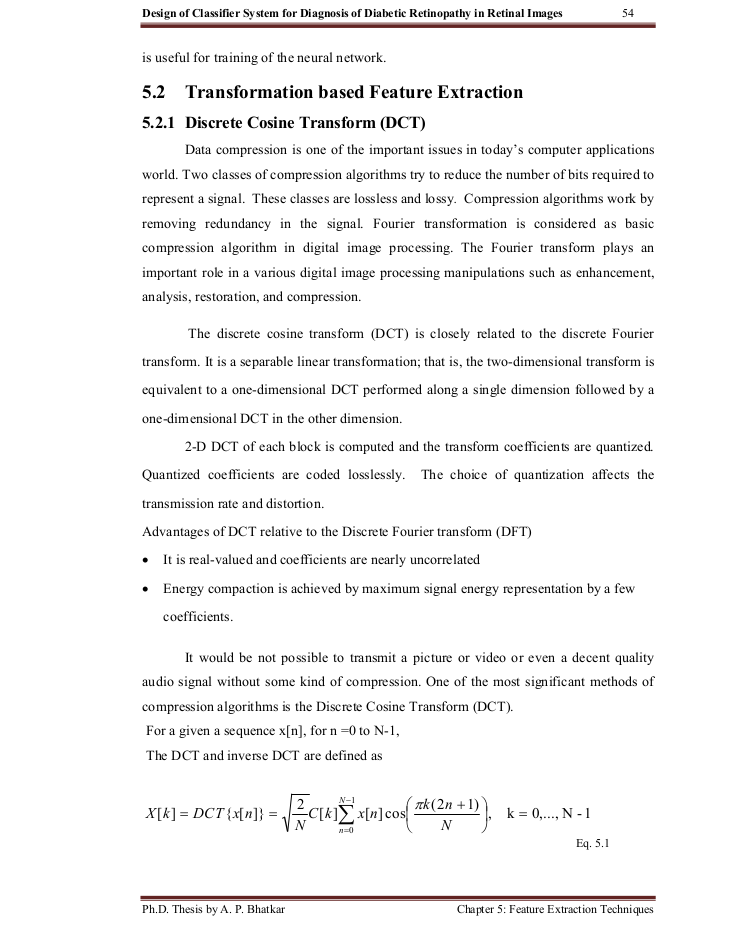

In [7]:
IPython.core.display.Image("Images/pdf-2.png", embed=True)

**Observation - Comparing the extraction with the image**
- Total content is missed and extrcated some strange sysmbols may be the symbols behind the equation but nothing can be inferred from this data

In [8]:
py_Pdf_Extraction(document[2])


Document info 

{'/CreationDate': 'D:20200114000217Z', '/Creator': 'TeX', '/ModDate': 'D:20200114000217Z', '/PTEX.Fullbanner': 'This is pdfTeX, Version 3.14159265-2.6-1.40.19 (TeX Live 2018) kpathsea version 6.3.0', '/Producer': 'pdfTeX-1.40.19', '/Trapped': '/False'}

 Number of pages: 7
Extracted page - 2nd 
 
 

TheExperimenthasimprovedresultsby22percentagecomparingtothe
existingmethods,thedatasetisthecollectionofwebpagesfromtheAmer-
icaneducationinstitutes,whereneedtoclassifybasedonthedepartments
(likecomputerscience,mechanicaletc)inadditiontothefacultiesofthe
department.

ThisisaTrueEngineeringproblemsincetheauthorhasprovedhissug-
gestionviaexperiment
2Paper-2
2.1Reference
Wang,T.;Pouyanfar,S.;Tian,H.;Tao,Y.;Alonso,M.;Luis,S.Chen,S.
AFrameworkforAirfarePricePrediction:AMachineLearningApproach
2019IEEE20thInternationalConferenceonInformationReuseandIntegration
forDataScience(IRI),2019,200-207
2.2Claim

Inthisarticleauthorhassuggestedthebestalgorithmtocomputeairfare
amongthevariousa

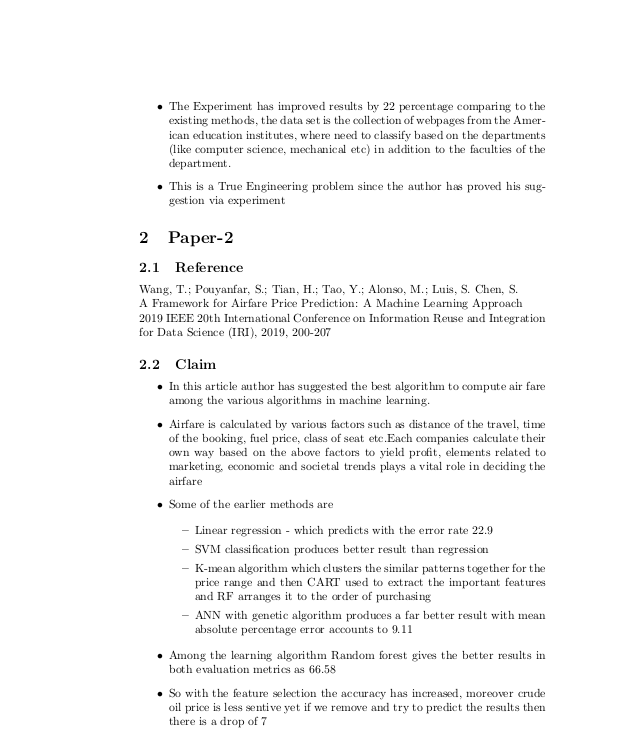

In [9]:
IPython.core.display.Image("Images/pdf-3.png", embed=True)

**Observation - Comparing the extraction with the image**
- The spacing between the words are totally ignored
- Bullets are missed or replaced with some brackets
- Comparatively better

In [10]:
py_Pdf_Extraction(document[3])


Document info 

{'/Previous#20producer': 'PDFlib+PDI 8.0.1p8 (Perl 5.10.0/Linux-x86_64)', '/Creator': 'The PaperPlaza Conference/Journal Management System', '/Keywords': 'Human Performance Augmentation; Navigation; Gesture, Posture, Social Spaces and Facial Expressions', '/Subject': 'Submitted to 2015 IEEE/RSJ International Conference on Intelligent Robots and Systems', '/Author': 'Barbara Bruno, Fulvio Mastrogiovanni, Antonio Sgorbissa', '/Title': 'HOOD: a Real Environment Human Odometry Dataset for Wearable Sensor Placement Analysis', '/CreationDate': "D:20150304123003-08'00'", '/Producer': 'PDFlib+PDI 8.0.1p8 (Perl 5.10.0/Linux-x86_64)'}

 Number of pages: 8
Extracted page - 2nd 
 
 
CONFIDENTIAL. Limited circulation. For review only.
Preprint submitted to 2015 IEEE/RSJ International Conference
on Intelligent Robots and Systems. Received March 4, 2015.



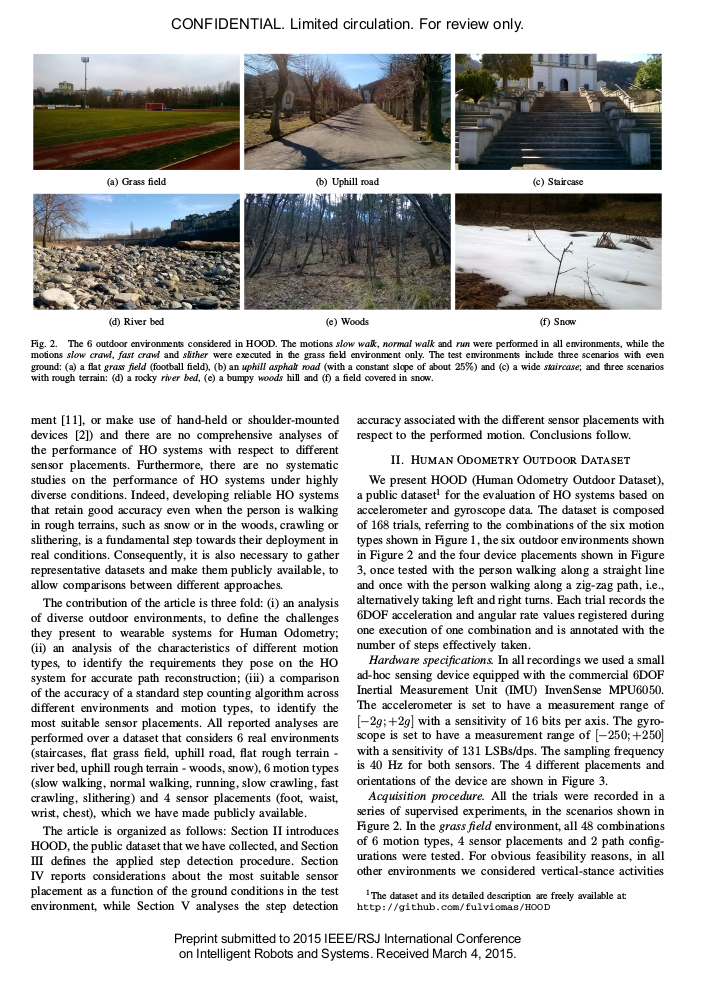

In [11]:
IPython.core.display.Image("Images/pdf-4.png", embed=True)

**Observation - Comparing the extraction with the image**
- Just the header and footer alone is being extracted

In [12]:
py_Pdf_Extraction(document[4])


Document info 

{'/Title': IndirectObject(93, 0), '/Producer': IndirectObject(94, 0), '/Creator': IndirectObject(95, 0), '/CreationDate': IndirectObject(96, 0), '/ModDate': IndirectObject(96, 0)}

 Number of pages: 4
Extracted page - 2nd 
 
 
Experiment DescriptionObservation Intervals: ¥The pattern is divided into two segments: left movement and right 
movement ¥For each segment four ranges are considered: 
A.entire range (10Hz to 12500Hz)  
B.range from 500Hz to 1000Hz 
C.range from 1000Hz to 1500Hz 
D.range from 7500Hz to 8000Hz
!2BCDA


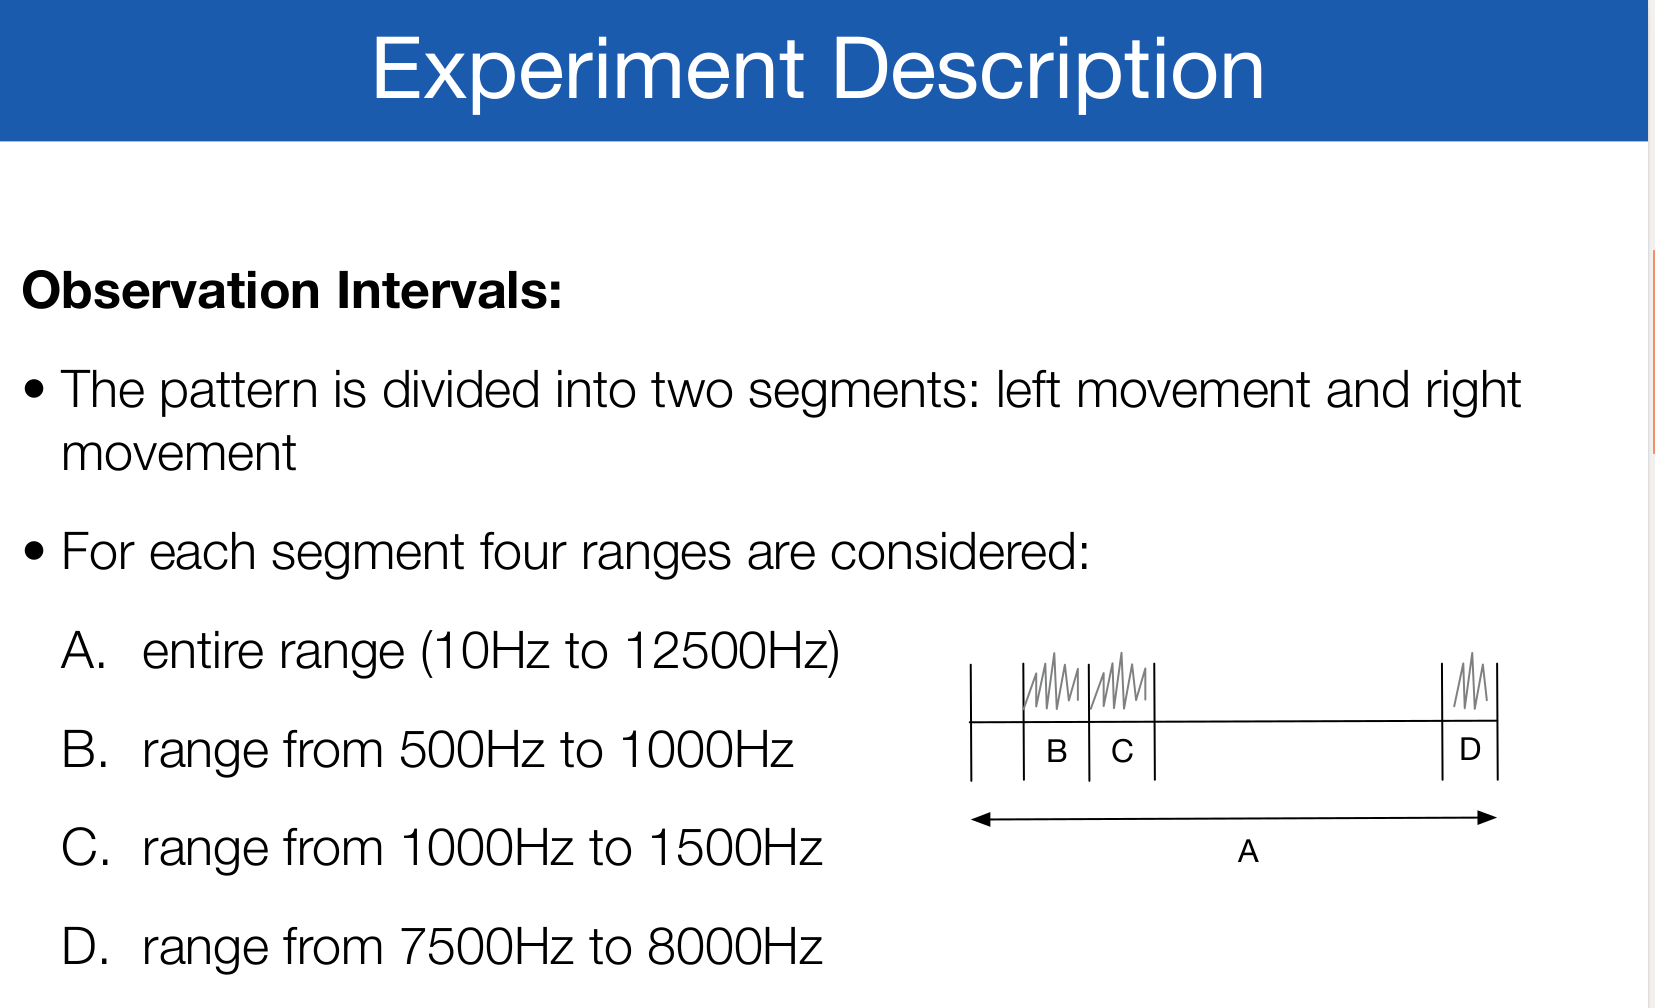

In [13]:
IPython.core.display.Image("Images/pdf-5.png", embed=True)

**Observation - Comparing the extraction with the image**
- Everything is extracted, some space are missing between the slide title and content though

In [14]:
py_Pdf_Extraction(document[5])


Document info 

{'/Title': 'Assessment details', '/Creator': 'wkhtmltopdf 0.12.2.1', '/Producer': 'Qt 4.8.6', '/CreationDate': 'D:20191209094248Z'}

 Number of pages: 15
Extracted page - 2nd 
 
 



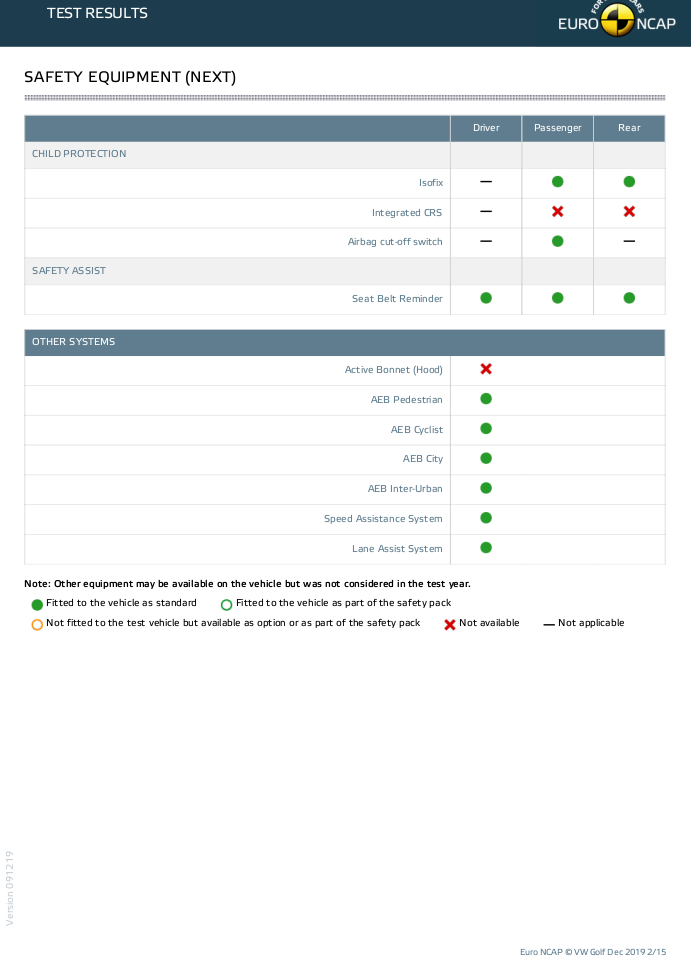

In [15]:
IPython.core.display.Image("Images/pdf-6.png", embed=True)

**Observation - Comparing the extraction with the image**
- Nothing is extracted

### Complete inference

- SafetyCompanion-2020-EN.pdf is being extracted but there is missing and misalignment of sentences
- euroncap-2019-vw-golf-datasheet.pdf is not extracted but the pyPDF2 has read the document
- Test_pdf_1.pdf is extracted yet not proper
- Test_pdf_2.pdf is comparatively extracted well
- Test_pdf_3.pdf only header and footer is being extracted
- Test_pdf_4.pdf is comparatively extracted well

From this the pyPDF2 works well for the self created plain text

## textract

In [16]:
def textract_Extraction(filename):
    text = textract.process(filename)
    print(text)

In [17]:
textract_Extraction(document[0])



UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 747: character maps to <undefined>

In [18]:
textract_Extraction(document[1])


b"53\n\nDesign of Classifier System for Diagnosis of Diabetic Retinopathy in Retinal Images\n\nCHAPTER 5\n\nFEATURE EXTRACTION TECHNIQUES\nProper representation of digital image can be achieved by reducing the number of\ndata points of the image signal in such a way that they maintain most of the information.\nThe data points of image signal are known as features. These features can be achieved by\nusing different feature extraction methods.\nRetinal image databases are useful to design the neural network based classifier\nsystem. These databases are the collection of two classes of retinal images; normal and\ndiabetic retinopathy affected retinal images (abnormal). It is expected that the classifier\nsystem must be capable to classify these images in specific class. The different features\nextracted from the images are used as input feature vectors to train the neural network\nclassifier.\n\n5.1\n\nFeature Extraction\nThe extracted features of retinal images classified into two groups

In [19]:
textract_Extraction(document[2])


b'Introduction to Scientific Working\nAssignment 11\n\n1\n\nPaper-1\n\n1.1\n\nReference\n\nBlum, A. Mitchell, T.\nCombining labeled and unlabeled data with co-training\nProceedings of the eleventh annual conference on Computational learning theory, 1998, 92-100\n\n1.2\n\nClaim\n\n\xe2\x80\xa2 In this article author has taken the task of classification of web pages\n\xe2\x80\xa2 Currently the web pages are classified by either supervised or unsupervised\nlearning\n\xe2\x80\xa2 Author has suggested the method of combining the both methods in such\na ratio of taking very few labelled data to a large set of unlabelled data\nwith which unlabelled data are sampled and classified. The algorithm as\nfollows\n\xe2\x80\x93 Consider L as event of labelled training example\n\xe2\x80\x93 U as a event of unlabeled training example\n\xe2\x80\x93 generate a pool of U\xe2\x80\x99 from the random sampling of U\n\xe2\x80\x93 Train the hypothesis h1 using L for a small portion x1 of x such that\nx1 \xe2\x

In [20]:
textract_Extraction(document[3])


b'CONFIDENTIAL. Limited circulation. For review only.\n\nHOOD: a Real Environment Human Odometry Dataset for\nWearable Sensor Placement Analysis\nBarbara Bruno, Fulvio Mastrogiovanni and Antonio Sgorbissa\nAbstract\xe2\x80\x94 Human Odometry (HO) is the process of providing\na person with a continuous estimate of their location, on the\nbasis of information acquired solely by sensors carried around\nby the person themselves. In an effort towards the development\nof effective and robust HO systems, we present the Human\nOdometry Outdoor Dataset (HOOD), a public collection of\nlabelled accelerometer and gyroscope data recordings. We\ncompare four sensor placements (foot, waist, wrist, chest) to\nidentify the most suitable placement for different types of\nmotions (ranging from walking to slithering), occurring in\nhighly diverse real environments (such as flat grass fields,\nstaircases and rough terrains).\n\n(a) Slow walk\n\n(b) Normal walk\n\n(c) Run\n\n(d) Slow crawl\n\n(e) Fast crawl

In [21]:
textract_Extraction(document[4])


b'Experiment Description\n\nExperiment Set Up\n\xe2\x80\xa2 Four pens with attached accelerometers are set in parallel onto a\npaper-covered glass plate\n\xe2\x80\xa2 The glass plate is moved in a given pattern under them.\n\xe2\x80\xa2 The resulting pattern is\n\nTriger signals\n\n1\n\n\x0cExperiment Description\nObservation Intervals:\n\xe2\x80\xa2 The pattern is divided into two segments: left movement and right\nmovement\n\xe2\x80\xa2 For each segment four ranges are considered:\nA. entire range (10Hz to 12500Hz)\nB. range from 500Hz to 1000Hz\n\nB\n\nC. range from 1000Hz to 1500Hz\nD. range from 7500Hz to 8000Hz\n\n2\n\nD\n\nC\nA\n\n\x0cFeature Description\nEach movement segment (left and right) will be converted from the time\ndomain to frequency domain using FFT\nFeatures for each range:\n\xe2\x80\xa2 Maximum amplitude\n\nRaw data\n\n\xe2\x80\xa2 Maximum "point energy\xe2\x80\x9c\n\nFFT\n\n\xe2\x80\xa2 Position of max. amplitude frequency\n\nAfter FFT\n\n\xe2\x80\xa2 Total energ

In [22]:
textract_Extraction(document[5])


b"TEST RESULTS\n\nVW Golf\n\n2019\n\nStandard Safety Equipment\nAdult Occupant\n\nChild Occupant\n\n95%\nVulnerable Road Users\n\n89%\nSafety Assist\n\n76%\n\n78%\n\nSPECIFICATION\nTested Model\n\nVW Golf, 1.5 petrol 'Comfortline', LHD\n\nBody Type\n\n- 5 door hatchback\n\nYear Of Publication\n\n2019\n\nKerb Weight\n\n1316kg\n\nVIN From Which Rating Applies\n\n- all Golfs\n\nClass\n\nSmall Family Car\n\nSAFETY EQUIPMENT\nDriver\n\nPassenger\n\nRear\n\nFRONTAL CRASH PROTECTION\nFrontal airbag\nBelt pretensioner\nBelt loadlimiter\nKnee airbag\n\nVersion 091219\n\nSIDE CRASH PROTECTION\nSide head airbag\nSide chest airbag\nSide pelvis airbag\n\nEuro NCAP \xc2\xa9 VW Golf Dec 2019 1/15\n\n\x0cTEST RESULTS\n\nSAFETY EQUIPMENT (NEXT)\nDriver\n\nPassenger\n\nRear\n\nCHILD PROTECTION\nIsofix\nIntegrated CRS\nAirbag cut-off switch\nSAFETY ASSIST\nSeat Belt Reminder\n\nOTHER SYSTEMS\nActive Bonnet (Hood)\nAEB Pedestrian\nAEB Cyclist\nAEB City\nAEB Inter-Urban\nSpeed Assistance System\nLane Assis

### Observation

- SafetyCompanion-2020-EN.pdf is given a error, observed that it couldn't read too many pages
- euroncap-2019-vw-golf-datasheet.pdf is extracted well
- Test_pdf_1.pdf is extracted well
- Test_pdf_2.pdf is  extracted well
- Test_pdf_3.pdf is extracted well
- Test_pdf_4.pdf is extracted well


### Complete inference
- There is a "\n" added for space and new line
- There are minor misalignments especially near the images or in the image text

## tika

In [23]:
def tika_Extraction(filename):
    file_data = parser.from_file(filename)
    text = file_data['content']
    meta_data = file_data['metadata']
    print("\n Meta data \n")
    print(meta_data)    
    print("\n Extracted content \n")
    print(text)

In [24]:
tika_Extraction(document[0])

2021-04-27 19:18:34,927 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar.md5 to /tmp/tika-server.jar.md5.
2021-04-27 19:18:35,592 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...



 Meta data 

{'Author': 'carhs.training gmbh', 'Content-Type': 'application/pdf', 'Creation-Date': '2019-12-19T09:09:40Z', 'Last-Modified': '2020-06-29T14:18:16Z', 'Last-Save-Date': '2020-06-29T14:18:16Z', 'X-Parsed-By': ['org.apache.tika.parser.DefaultParser', 'org.apache.tika.parser.pdf.PDFParser'], 'X-TIKA:content_handler': 'ToTextContentHandler', 'X-TIKA:embedded_depth': '0', 'X-TIKA:parse_time_millis': '5363', 'access_permission:assemble_document': 'false', 'access_permission:can_modify': 'false', 'access_permission:can_print': 'true', 'access_permission:can_print_degraded': 'false', 'access_permission:extract_content': 'false', 'access_permission:extract_for_accessibility': 'false', 'access_permission:fill_in_form': 'false', 'access_permission:modify_annotations': 'false', 'created': '2019-12-19T09:09:40Z', 'creator': 'carhs.training gmbh', 'date': '2020-06-29T14:18:16Z', 'dc:creator': 'carhs.training gmbh', 'dc:format': 'application/pdf; version=1.6', 'dc:language': 'de-DE', 'd

**Observation**
- There are some misalignments and different symbols yet this happens in the sentence in the image or near the image

In [25]:
tika_Extraction(document[1])


 Meta data 

{'Author': 'harsh', 'Content-Type': 'application/pdf', 'Creation-Date': '2018-01-03T07:03:41Z', 'Last-Modified': '2018-01-03T07:03:48Z', 'Last-Save-Date': '2018-01-03T07:03:48Z', 'X-Parsed-By': ['org.apache.tika.parser.DefaultParser', 'org.apache.tika.parser.pdf.PDFParser'], 'X-TIKA:content_handler': 'ToTextContentHandler', 'X-TIKA:embedded_depth': '0', 'X-TIKA:parse_time_millis': '223', 'access_permission:assemble_document': 'true', 'access_permission:can_modify': 'true', 'access_permission:can_print': 'true', 'access_permission:can_print_degraded': 'true', 'access_permission:extract_content': 'true', 'access_permission:extract_for_accessibility': 'true', 'access_permission:fill_in_form': 'true', 'access_permission:modify_annotations': 'true', 'created': '2018-01-03T07:03:41Z', 'creator': 'harsh', 'date': '2018-01-03T07:03:48Z', 'dc:creator': 'harsh', 'dc:format': 'application/pdf; version=1.5', 'dc:title': 'Microsoft Word - self publications.doc', 'dcterms:created': '20

**Observation**
- Texts are extracted well but equations are totally messed

In [26]:
tika_Extraction(document[2])


 Meta data 

{'Content-Type': 'application/pdf', 'Creation-Date': '2020-01-14T00:02:17Z', 'Last-Modified': '2020-01-14T00:02:17Z', 'Last-Save-Date': '2020-01-14T00:02:17Z', 'PTEX.Fullbanner': 'This is pdfTeX, Version 3.14159265-2.6-1.40.19 (TeX Live 2018) kpathsea version 6.3.0', 'X-Parsed-By': ['org.apache.tika.parser.DefaultParser', 'org.apache.tika.parser.pdf.PDFParser'], 'X-TIKA:content_handler': 'ToTextContentHandler', 'X-TIKA:embedded_depth': '0', 'X-TIKA:parse_time_millis': '3866', 'access_permission:assemble_document': 'true', 'access_permission:can_modify': 'true', 'access_permission:can_print': 'true', 'access_permission:can_print_degraded': 'true', 'access_permission:extract_content': 'true', 'access_permission:extract_for_accessibility': 'true', 'access_permission:fill_in_form': 'true', 'access_permission:modify_annotations': 'true', 'created': '2020-01-14T00:02:17Z', 'date': '2020-01-14T00:02:17Z', 'dc:format': 'application/pdf; version=1.5', 'dcterms:created': '2020-01-1

**Observation**
- Extracted well even with same bullets and some symbols are also has extracted well

In [27]:
tika_Extraction(document[3])


 Meta data 

{'Author': 'Barbara Bruno, Fulvio Mastrogiovanni, Antonio Sgorbissa', 'Content-Type': 'application/pdf', 'Creation-Date': '2015-03-04T20:30:03Z', 'Keywords': 'Human Performance Augmentation; Navigation; Gesture, Posture, Social Spaces and Facial Expressions', 'Previous producer': 'PDFlib+PDI 8.0.1p8 (Perl 5.10.0/Linux-x86_64)', 'X-Parsed-By': ['org.apache.tika.parser.DefaultParser', 'org.apache.tika.parser.pdf.PDFParser'], 'X-TIKA:content_handler': 'ToTextContentHandler', 'X-TIKA:embedded_depth': '0', 'X-TIKA:parse_time_millis': '244', 'access_permission:assemble_document': 'true', 'access_permission:can_modify': 'true', 'access_permission:can_print': 'true', 'access_permission:can_print_degraded': 'true', 'access_permission:extract_content': 'true', 'access_permission:extract_for_accessibility': 'true', 'access_permission:fill_in_form': 'true', 'access_permission:modify_annotations': 'true', 'cp:subject': 'Submitted to 2015 IEEE/RSJ International Conference on Intelligen

**Observation**
- There are some misalignments in the sentence in the image or near the image
- Extracted even the text from the table well

In [28]:
tika_Extraction(document[4])


 Meta data 

{'Content-Type': 'application/pdf', 'Creation-Date': '2019-04-29T12:17:28Z', 'Last-Modified': '2019-04-29T12:17:28Z', 'Last-Save-Date': '2019-04-29T12:17:28Z', 'X-Parsed-By': ['org.apache.tika.parser.DefaultParser', 'org.apache.tika.parser.pdf.PDFParser'], 'X-TIKA:content_handler': 'ToTextContentHandler', 'X-TIKA:embedded_depth': '0', 'X-TIKA:parse_time_millis': '10', 'access_permission:assemble_document': 'true', 'access_permission:can_modify': 'true', 'access_permission:can_print': 'true', 'access_permission:can_print_degraded': 'true', 'access_permission:extract_content': 'true', 'access_permission:extract_for_accessibility': 'true', 'access_permission:fill_in_form': 'true', 'access_permission:modify_annotations': 'true', 'created': '2019-04-29T12:17:28Z', 'date': '2019-04-29T12:17:28Z', 'dc:format': 'application/pdf; version=1.3', 'dc:title': '2019-LA-ProjectDescription', 'dcterms:created': '2019-04-29T12:17:28Z', 'dcterms:modified': '2019-04-29T12:17:28Z', 'meta:crea

**Observation**
- There are some misalignments in the sentence in the image or near the image
- Extracted the text well but there are some different symbols to note the slide numbers

In [29]:
tika_Extraction(document[5])


 Meta data 

{'Content-Type': 'application/pdf', 'Creation-Date': '2019-12-09T09:42:48Z', 'X-Parsed-By': ['org.apache.tika.parser.DefaultParser', 'org.apache.tika.parser.pdf.PDFParser'], 'X-TIKA:content_handler': 'ToTextContentHandler', 'X-TIKA:embedded_depth': '0', 'X-TIKA:parse_time_millis': '194', 'access_permission:assemble_document': 'true', 'access_permission:can_modify': 'true', 'access_permission:can_print': 'true', 'access_permission:can_print_degraded': 'true', 'access_permission:extract_content': 'true', 'access_permission:extract_for_accessibility': 'true', 'access_permission:fill_in_form': 'true', 'access_permission:modify_annotations': 'true', 'created': '2019-12-09T09:42:48Z', 'dc:format': 'application/pdf; version=1.4', 'dc:title': 'Assessment details', 'dcterms:created': '2019-12-09T09:42:48Z', 'meta:creation-date': '2019-12-09T09:42:48Z', 'pdf:PDFVersion': '1.4', 'pdf:charsPerPage': ['549', '600', '322', '269', '1404', '515', '501', '236', '1348', '852', '321', '618'

**Observation**
- There are some misalignments in the sentence in the image or near the image
- Extracted even the text from the table well

### Inference

All the files have been extracted well, yet there are some misalignments but compare to previous two methods this have did far better.


## Safety companion only 20 and 24

In [30]:
tika_Extraction(document[-1])


 Meta data 

{'Author': 'carhs.training gmbh', 'Content-Type': 'application/pdf', 'Creation-Date': '2019-12-19T09:09:40Z', 'Last-Modified': '2021-04-27T17:12:48Z', 'Last-Save-Date': '2021-04-27T17:12:48Z', 'X-Parsed-By': ['org.apache.tika.parser.DefaultParser', 'org.apache.tika.parser.pdf.PDFParser'], 'X-TIKA:content_handler': 'ToTextContentHandler', 'X-TIKA:embedded_depth': '0', 'X-TIKA:parse_time_millis': '47', 'access_permission:assemble_document': 'true', 'access_permission:can_modify': 'true', 'access_permission:can_print': 'true', 'access_permission:can_print_degraded': 'true', 'access_permission:extract_content': 'true', 'access_permission:extract_for_accessibility': 'true', 'access_permission:fill_in_form': 'true', 'access_permission:modify_annotations': 'true', 'created': '2019-12-19T09:09:40Z', 'creator': 'carhs.training gmbh', 'date': '2021-04-27T17:12:48Z', 'dc:creator': 'carhs.training gmbh', 'dc:format': 'application/pdf; version=1.4', 'dc:language': 'de-DE', 'dc:title':

## PdfPlumber

In [ ]:
def pdfplumber_Extraction(filename):
    with pdfplumber.open(filename) as pdf:
        page = pdf.pages[1]
        print(page.extract_text())

## End note

- Texract, tika doesn't have more functionalities in built like document info (tika has but it adds too much unwanted data), pagenumber, individual page extraction, applying filters, writing data to pdf, encrypting and decrypting pdf as in pyPDF2.
- PdfPlumber is not tried since there is error in the installation package couldn't trace it.
- Pdfminer seems to use PyPDF2 initially to extract the pdf so felt redundant to do this.

### Reference

<a href="https://stackoverflow.com/questions/34837707/how-to-extract-text-from-a-pdf-file" target="_top">Pdf extraction from stack overflow</a><br>
<a href="https://pythonhosted.org/PyPDF2/" target="_top">PyPDF2</a><br>
<a href="https://textract.readthedocs.io/en/latest/python_package.html" target="_top">Texract</a><br>
<a href="https://github.com/chrismattmann/tika-python" target="_top">Tika</a><br>
<a href="https://github.com/jsvine/pdfplumber" target="_top">PdfPlumber</a><br>
<a href="https://github.com/gwk/pdfminer3/blob/master/README.md" target="_top">Pdfminer</a><br>
<a href="https://towardsdatascience.com/pdf-text-extraction-in-python-5b6ab9e92dd" target="_top">PyPDF and pdfminer</a><br>
<a href="https://pikepdf.readthedocs.io/en/latest/tutorial.html" target="_top">PikePDF</a><br>

